In [60]:
import pandas as pd
import numpy as np

In [2]:
try:
    df_raw = pd.read_csv('../data/dataset_saude_brasil.csv', sep=',')
    print("Arquivo carregado com sucesso!")

except FileNotFoundError:
    print("Erro: O arquivo 'dataset_saude_brasil.csv' não foi encontrado no diretório 'data/'.")
    
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Arquivo carregado com sucesso!


In [3]:
df_raw.head()

,ID,Idade,Sexo,IMC,Passos_Diarios,Horas_Sono,Agua_Litros,Calorias,Fumante,Alcool,Horas_Trabalho,Frequencia_Cardiaca_Repouso,Pressao_Sistolica,Pressao_Diastolica,Colesterol,Historico_Familiar,Risco_Doenca
0,1,69.0,Masculino,29.1,15604.0,7.4,0.9,1297.0,Não,Moderado,8,86,123,95,225.0,Não,Baixo
1,2,32.0,Feminino,22.3,9607.0,7.6,1.9,3529.0,Não,Moderado,12,54,140,85,222.0,Sim,Baixo
2,3,89.0,Masculino,25.6,4160.0,6.7,2.3,4399.0,Não,Moderado,10,75,110,60,131.0,Sim,Moderado
3,4,78.0,Feminino,35.3,3569.0,6.9,0.7,1595.0,Não,Baixo,9,92,167,117,199.0,Não,Alto
4,5,38.0,Masculino,NaN,13174.0,8.2,1.1,1635.0,Não,Baixo,12,73,105,77,266.0,Sim,Moderado


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           20000 non-null  int64  
 1   Idade                        19651 non-null  float64
 2   Sexo                         20000 non-null  object 
 3   IMC                          19650 non-null  float64
 4   Passos_Diarios               19801 non-null  object 
 5   Horas_Sono                   20000 non-null  float64
 6   Agua_Litros                  20000 non-null  float64
 7   Calorias                     19800 non-null  object 
 8   Fumante                      20000 non-null  object 
 9   Alcool                       20000 non-null  object 
 10  Horas_Trabalho               20000 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  20000 non-null  int64  
 12  Pressao_Sistolica            20000 non-null  int64  
 13  Pressao_Diastoli

In [13]:
df_raw.isnull().sum()

ID                               0
Idade                          349
Sexo                             0
IMC                            350
Passos_Diarios                 199
Horas_Sono                       0
Agua_Litros                      0
Calorias                       200
Fumante                          0
Alcool                           0
Horas_Trabalho                   0
Frequencia_Cardiaca_Repouso      0
Pressao_Sistolica                0
Pressao_Diastolica               0
Colesterol                     199
Historico_Familiar               0
Risco_Doenca                     0
dtype: int64

In [17]:
df_raw.shape

(20000, 17)

In [19]:
duplicados_id = df_raw[df_raw['ID'].duplicated(keep=False)]
print("\nLinhas com valores duplicados na coluna 'ID':")
print(duplicados_id)


Linhas com valores duplicados na coluna 'ID':
Empty DataFrame
Columns: [ID, Idade, Sexo, IMC, Passos_Diarios, Horas_Sono, Agua_Litros, Calorias, Fumante, Alcool, Horas_Trabalho, Frequencia_Cardiaca_Repouso, Pressao_Sistolica, Pressao_Diastolica, Colesterol, Historico_Familiar, Risco_Doenca]
Index: []


In [25]:
df_clean = df_raw.dropna()

In [27]:
df_clean.shape

(18740, 17)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18740 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18740 non-null  int64  
 1   Idade                        18740 non-null  float64
 2   Sexo                         18740 non-null  object 
 3   IMC                          18740 non-null  float64
 4   Passos_Diarios               18740 non-null  object 
 5   Horas_Sono                   18740 non-null  float64
 6   Agua_Litros                  18740 non-null  float64
 7   Calorias                     18740 non-null  object 
 8   Fumante                      18740 non-null  object 
 9   Alcool                       18740 non-null  object 
 10  Horas_Trabalho               18740 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  18740 non-null  int64  
 12  Pressao_Sistolica            18740 non-null  int64  
 13  Pressao_Diastolica   

In [39]:
df_clean["Calorias"] = pd.to_numeric(df_clean["Calorias"], errors="coerce")
df_clean["Colesterol"] = pd.to_numeric(df_clean["Colesterol"], errors="coerce")
df_clean["Passos_Diarios"] = pd.to_numeric(df_clean["Passos_Diarios"], errors="coerce")

In [41]:
display(df_clean[["Passos_Diarios","Calorias", "Colesterol"]].isna().sum())

Passos_Diarios    145
Calorias          145
Colesterol        140
dtype: int64

In [43]:
df_clean = df_clean.dropna()

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18313 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18313 non-null  int64  
 1   Idade                        18313 non-null  float64
 2   Sexo                         18313 non-null  object 
 3   IMC                          18313 non-null  float64
 4   Passos_Diarios               18313 non-null  float64
 5   Horas_Sono                   18313 non-null  float64
 6   Agua_Litros                  18313 non-null  float64
 7   Calorias                     18313 non-null  float64
 8   Fumante                      18313 non-null  object 
 9   Alcool                       18313 non-null  object 
 10  Horas_Trabalho               18313 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  18313 non-null  int64  
 12  Pressao_Sistolica            18313 non-null  int64  
 13  Pressao_Diastolica   

In [47]:
df_clean = df_clean.drop(columns=["ID"], errors="ignore")

In [62]:
colunas_quantitativas = df_clean.select_dtypes(include=np.number).columns.tolist()

In [78]:
print("--- Colunas Quantitativas (Numéricas) ---")
print(colunas_quantitativas)

--- Colunas Quantitativas (Numéricas) ---
['Idade', 'IMC', 'Passos_Diarios', 'Horas_Sono', 'Agua_Litros', 'Calorias', 'Horas_Trabalho', 'Frequencia_Cardiaca_Repouso', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Colesterol']


In [66]:
colunas_qualitativas = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

In [80]:
print("--- Colunas Qualitativas (Categóricas) ---")
print(colunas_qualitativas)

--- Colunas Qualitativas (Categóricas) ---
['Sexo', 'Fumante', 'Alcool', 'Historico_Familiar', 'Risco_Doenca']


In [98]:
for categoria in colunas_qualitativas:
    print(f"\nColuna: {categoria}")
    print(df_clean[categoria].unique())


Coluna: Sexo
['Masculino' 'Feminino']

Coluna: Fumante
['Não' 'Sim']

Coluna: Alcool
['Moderado' 'Baixo' 'Alto']

Coluna: Historico_Familiar
['Não' 'Sim']

Coluna: Risco_Doenca
['Baixo' 'Moderado' 'Alto' 'Muito Alto']


# Análise 

In [70]:
df_clean[colunas_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,18313.0,53.465462,20.759772,18.0,35.0,53.0,71.0,89.0
IMC,18313.0,24.981975,4.991810,2.7,21.6,25.0,28.3,45.5
Passos_Diarios,18313.0,10526.377491,5454.005451,1000.0,5840.0,10527.0,15235.0,19999.0
Horas_Sono,18313.0,7.003380,1.506376,1.1,6.0,7.0,8.0,13.2
Agua_Litros,18313.0,1.998203,0.704767,-0.7,1.5,2.0,2.5,4.7
Calorias,18313.0,3288.315732,1976.150638,1200.0,2156.0,3134.0,4110.0,24970.0
Horas_Trabalho,18313.0,8.505543,2.857601,4.0,6.0,9.0,11.0,13.0
Frequencia_Cardiaca_Repouso,18313.0,74.536832,14.516828,50.0,62.0,75.0,87.0,99.0
Pressao_Sistolica,18313.0,134.625894,26.064592,90.0,112.0,135.0,157.0,179.0
Pressao_Diastolica,18313.0,89.557637,17.322137,60.0,75.0,90.0,104.0,119.0


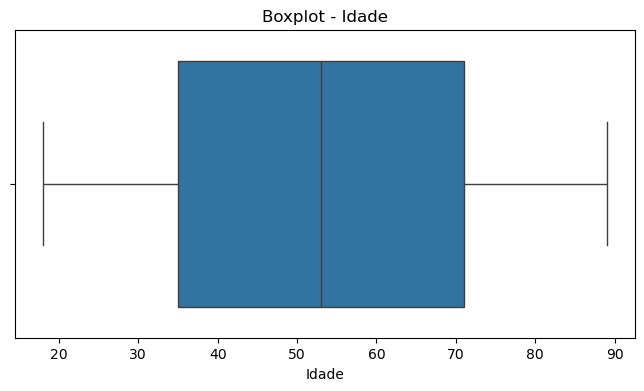

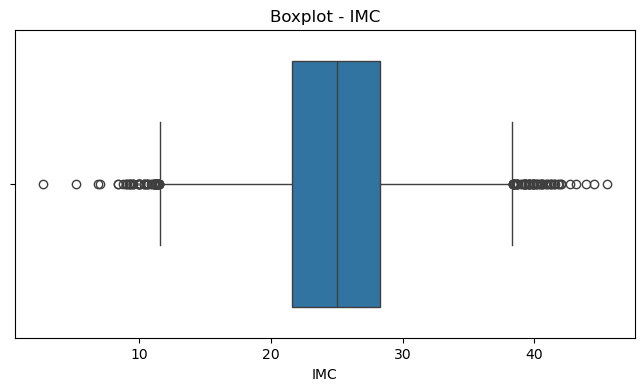

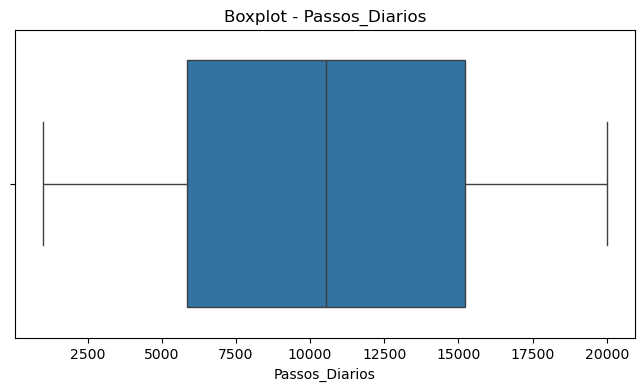

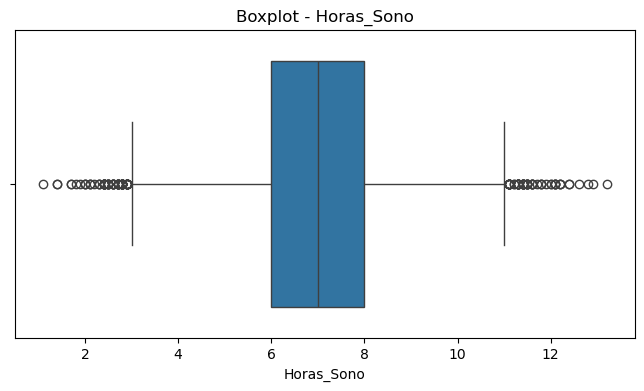

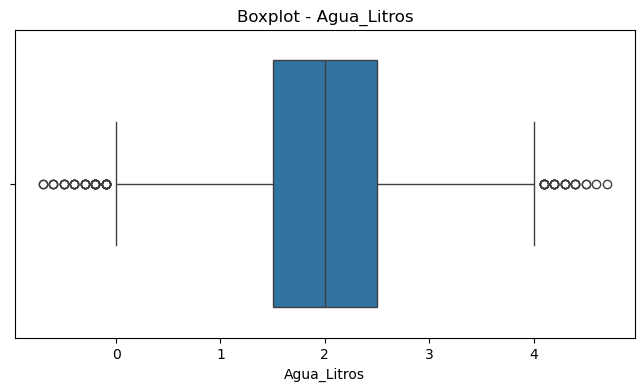

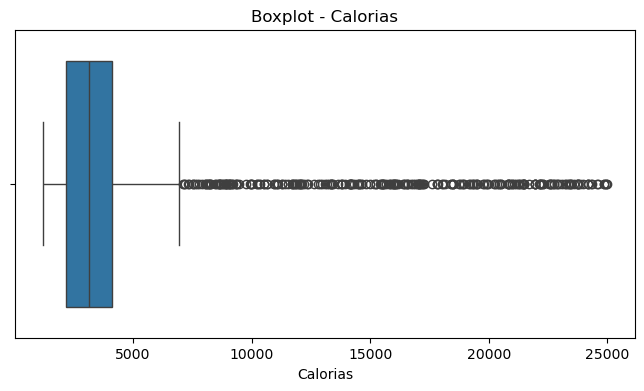

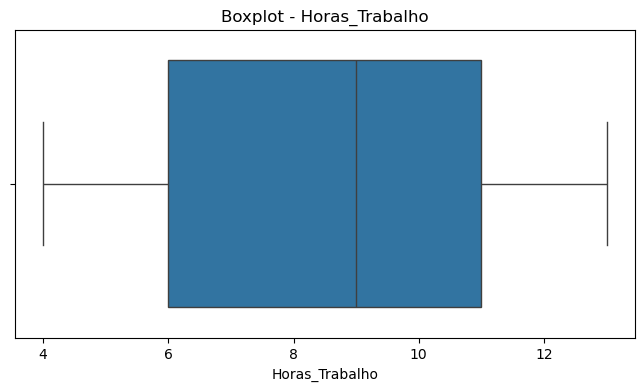

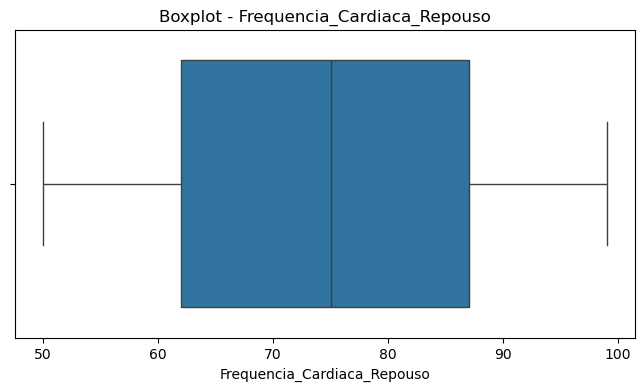

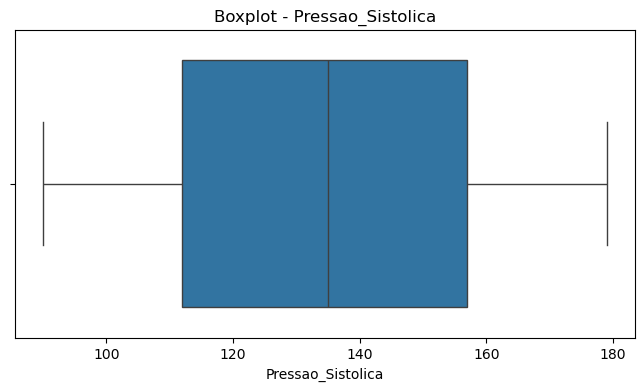

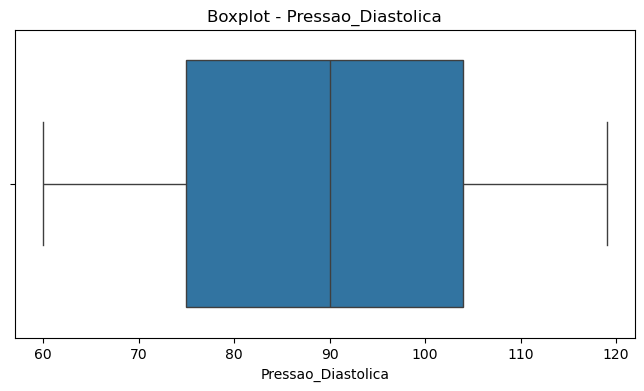

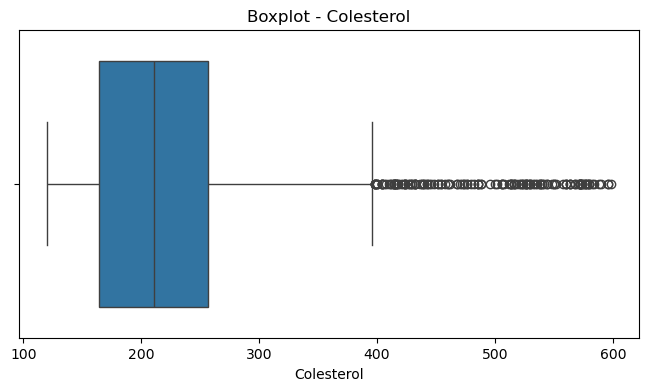

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas
colunas_numericas = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Criar boxplots para cada variável numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[coluna])
    plt.title(f"Boxplot - {coluna}")
    plt.show()

# Análise Bivariada

# Análise Multivariada